In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib import rc
from aux import Aux
aux = Aux()

plt.style.use('classic')
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
#rc('text.latex', preamble=r'\usepackage{cmbright}')

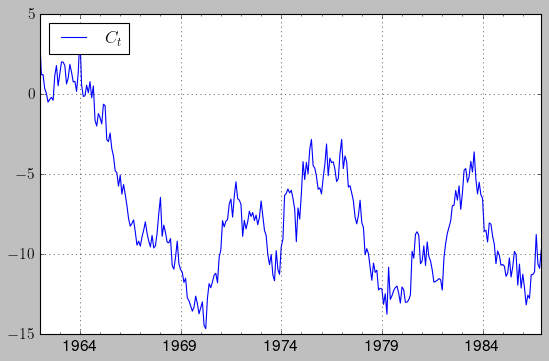

In [4]:
C = pd.read_csv(aux.find("C.csv", "results"), index_col=0).apply(lambda x: aux.dt_idx(x))
fig = aux.aurum_fig()
ax = fig.gca()
C[(C.index.year > 1961) & (C.index.year < 1987)].plot(ax=ax)
ax.grid(linewidth=0.5, label="C_t")
ax.legend([r"$C_t$"], loc="upper left", fontsize=16)
#for year in years: ax.axvline(dt.datetime(year,10,1), linewidth=0.6,linestyle='-.')
aux.save_myfig("CEI.eps", fig)